In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from dateutil.relativedelta import TU
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

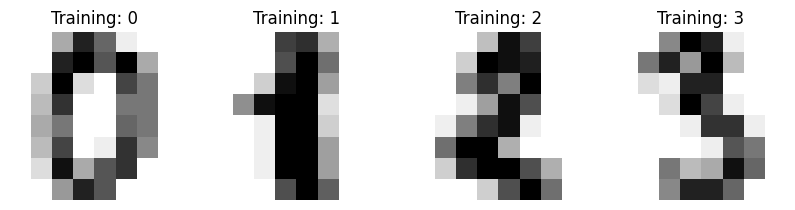

In [7]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

In [8]:
from numpy import False_
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

#create a classfier: a support vector classifier
clf = svm.SVC(gamma=0.001)

#split data into 50% train and 50% test subsets
x_train, x_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

#learn the digit on the train subset
clf.fit(x_train, y_train)

#predict the value of the digit on the test subset
predicted = clf.predict(x_test)

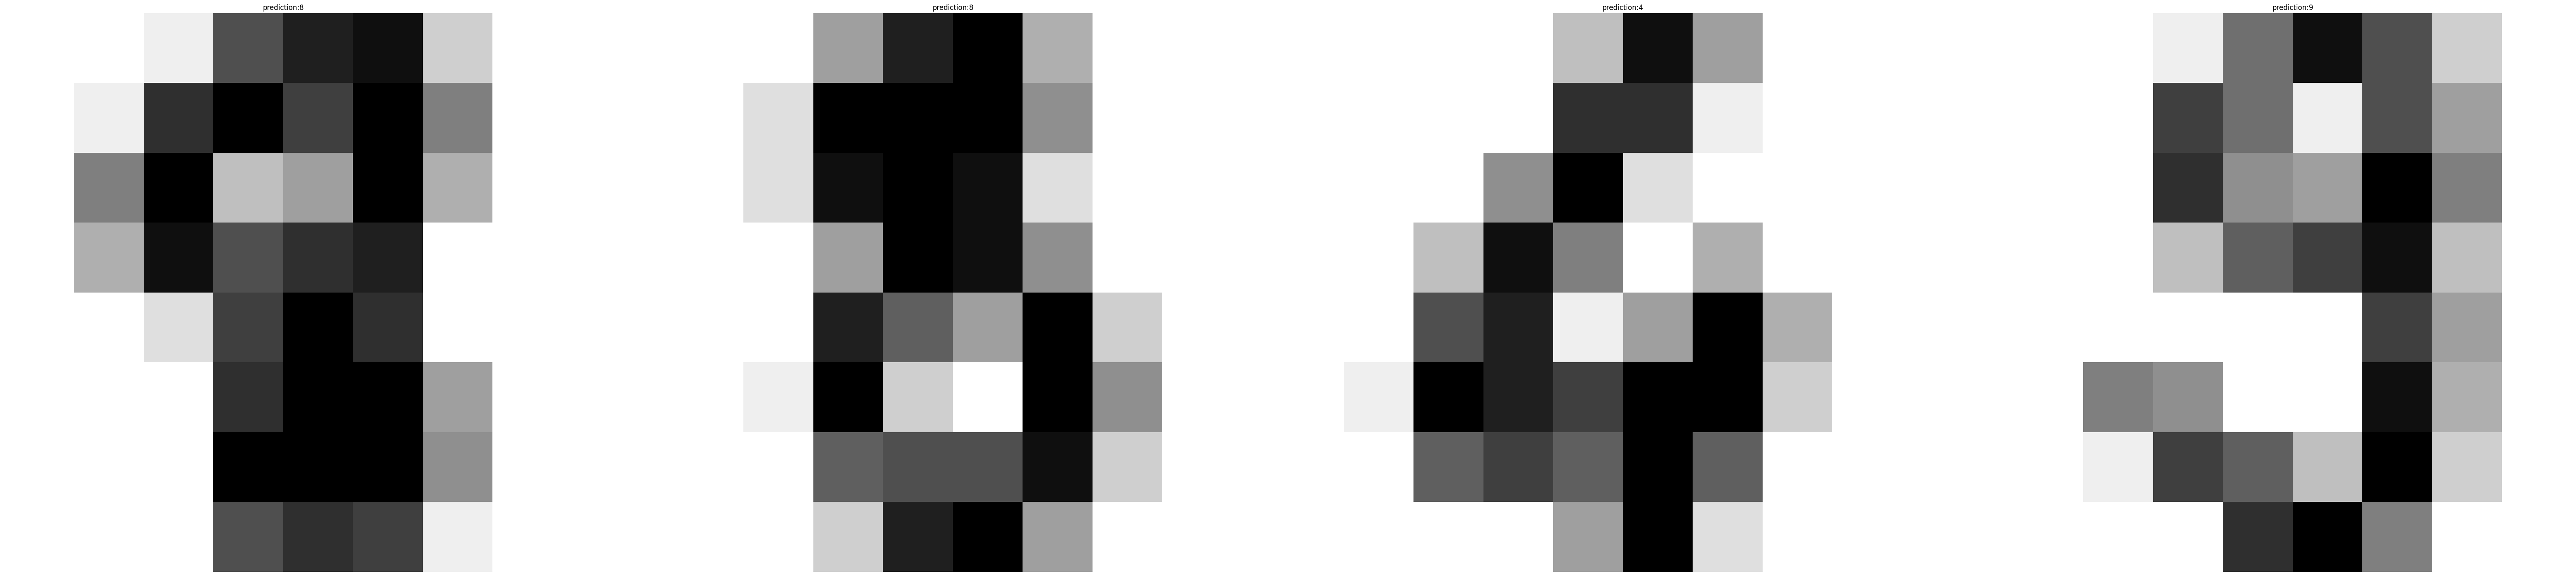

In [9]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(80, 20))
for ax, image, prediction in zip(axes, x_test, predicted):
  ax.set_axis_off()
  image = image.reshape(8, 8)
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title(f"prediction:{prediction}")

In [10]:
print(
    f"Classification report for classifier {clf}: \n"
    f"{metrics.classification_report(y_test,predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001): 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix: 
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


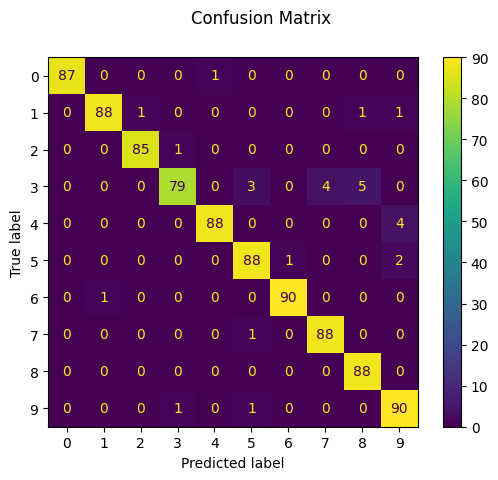

In [11]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix: \n{disp.confusion_matrix}")

plt.show()

In [12]:
# the ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

#for aech cell in the confusion matrix, add the corresponding grounp trusths
#and predictions to the lists
for gt in range(len(cm)):
  for pred in range(len(cm)):
    y_true += [gt] * cm[gt][pred]
    y_pred += [pred] * cm[gt][pred]

    print(
        "Classification report rebuit from confusion matrix:\n"
        f"{metrics.classification_report(y_true, y_pred)}\n"
    )

Classification report rebuit from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87


Classification report rebuit from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87


Classification report rebuit from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87


Classification report 

/home/fabio/PycharmProjects/PythonProject/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fabio/PycharmProjects/PythonProject/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fabio/PycharmProjects/PythonProject/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

Classification report rebuit from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.99      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.97      0.97      0.97        91
           6       0.99      0.99      0.99        91
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.96       630
   macro avg       0.69      0.67      0.68       630
weighted avg       0.99      0.96      0.97       630


Classification report rebuit from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99    

/home/fabio/PycharmProjects/PythonProject/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fabio/PycharmProjects/PythonProject/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/fabio/PycharmProjects/PythonProject/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

In [13]:
x, y = datasets.load_iris(return_X_y=True)
x.shape, y.shape

((150, 4), (150,))

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.4, random_state=0
)

In [15]:
x_train.shape, y_train.shape

((90, 4), (90,))

In [16]:
x_test.shape, y_test.shape

((60, 4), (60,))

In [17]:
clf = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)
clf.score(x_test, y_test)

0.9666666666666667

In [18]:
x = [[0, 0], [1,1]]
y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(x, y)

questao 2 A) qual a acuracia do modelo ? justifique

"a acuracia e um metrica comun usada para avaliar o desempenho de modelo de machine learning, especialmente em problemas de classificacao. ela mede a proporcao de predicoes corretas feitas pelo modelo em relacao ao total predicoes feitas"

B) o modelo teve uma boa performace? justifique

"sim a valiacao cruzada e uma tecnica que divide os dados em conjuntos de treinamentos e teste multiplos para avaliar o desempenho do modelo em diferentes divisoes dos dados. isso ajunda a verificar a estabilidades do desempenho do modelo"

C) quais foram os melhores paramentros escolhidos? justifique

"a busca aleatoria envolve a amostra aleatoria de valores, para os hiperparametros em vez de avaliar todas as combinacoes possiveis isso pode ser mais eficientes do ponto de vista computacinal do que a busca em grade e muitas vezes produz resultados semelhantes"

D) quais as pricipais dificuldades encotradas para a criacao do seu projeto de classificao?

"a dificuldade foi a qualidade dos dados sao fundamentais para o sucesso de um modelo machine learning. coletar, limpar e preparar dados relevantes pode ser um tarefa demorada e complicada."

questao 3

A) qual e a deferanca entre um parametro de modelo e um algoritimo de apredizagem de hiperparametro

"parametros de modelo(model paramets) os parametros de modelo sao os valores internos do modelo que sao aprendidos durantes o treinamento. eles sao os pesos e coeficieentes que definem a realacao matematica entre os variaveis de entrada(features)e a variavel de saida (retulo ou valor alvo) em modelo de machine learnig"

"Hiperparametros(hyperparametros): os hiperparametros sao configuracoes externas os modelos que controlam seu comportameto e sua capacidade. eles nao sao apredidos diretamente do conjunto de dados durante o treinamentro, mas sao definidos antes do seu treinamento comecar"

B) voce pode citar quatro dos pricipais dasafios de aprendizado de maquina

"aquisicao e preparacao de dados: obter dados de alta qualidade e prepara-los para uso em modelos de machine learning e muitas vezes uma tarefa ardua. os desafios incluem lidar com dados ausentes, dados ruidos, dados desbalanceados e,em muitos casos, garantir a privacidade e a seguranca dos dados."

"selecao de caracteristicas (Feature selection): escolher as variaveis de entradas (features) mais relevantes e informativas para um problema e fudamental. a selecao inadequada de caracristicas pode levar a modelos de baixa qualidade ou a um alto cosumo de recursos computacionais"

"interpretabilidade e explicabilidade: muitos modelos de machine learning, especialmente modelos complexos como redes neurais profundas, sao caixas-pretas, o que significa que e dificl entender como eles tomam decisoes. interpretar e explicar as decisoes do modelo e crucial em aplicacoes criticas, como na area de saude e em sistemas autonomos"

"vies e equidade: modelos de machine learning podem apreder vieses existentes nos dados de treinamento, resultando em previsoes injustar ou discriminatorias. garantir a qualidade e mitigar vieis no modelos e um desafio importante, especilmente em contextos sociais e de tomada de dicisoes importantes"

B) se seu modelo tem um otimo desempenho nos dados de treinamento, mas generalizar mal para novas instacias, o que esta acontecendo? voce citar tres solucoes possiveis

"regularizao: a regularizao e um tecnica que adiciona uma penalizacao aos parametros do modelo para evitar que eles se tornem muito grande. duas formas comuns de regularizao sao a l1 (lasso)e a l2(ridge) regularizao que penalizam os valores absolutos e os quadrados dos parametros, respectivamente. isso ajudda a simplificar o modelo, reduzindo o risco de overfitthing"

"aumento de dados (data augmentation): aumento de dados envolve a criacao de novas instancias de treinamento por meio de transformacoes ou pertubacoes dos dados existentes. por exemplo, em visao computacional, voce criar novas imagens girando escalando ou cortando as imagens originais. isso ajunda a aumentar a diversidade dos dados de treinamento e reduzir o overfitting"

"diminuicao de complexidade do modelo: reduzir a complexidade do modelo e um abordagem eficaz para combater o overfitting. isso pode ser feito reduzindo o numero de caracristicas (feature selection), diminuindo o numero de camadas e unidades em redes neurais, reduzindo a profundidade de arvores de decisao, etc. um modelo mais simples e menos propenso a ser ajustar em excesso aos dados de treinamento"

D) o que e um conjunto de testo e por que voce deveria usalo-lo?

"deteccao de overfitting u underfitting: o conjunto de teste ajuda a identificar problema como overfitting (modelo se ajustando em excesso aos dados de treinamento) ou inderfitting (modelo nao se ajustando o suficiente). um modelo que fuciona bem nos dados de treinamentos, mas mal nos dados de teste, e um sinal de overfitting"

E) qual e o proposito de um conjunto de validacao?

"feedback para melhoria: os resultados do conjunto de validacao fornecem feedback valioso para refinamentos adicionais do modelo, como engenharia de resuros, selecao de caracteristicas e otimizacao"

F) o que pode dar errado se voce ajustar hiperparametro usando o conjunto de teste?

"perda da avaliacao independente: o conjunto de teste deve ser mantido independentemente dos dados de teinamento e do processo de ajuste de hiperparametro. se voce usar o conjunto de teste para escolher hiperpametros, eles deixara de ser um medida impacial do desempenho do modelo em dados nao visto, comprometendo a validade de sua avalicao."
